#28=IfcCompositeCurve((),.F.)
#29=IfcGradientCurve((),.F.,#28,$)


RuntimeError: Failed to process shape. Instance: #28=IfcCompositeCurve((),.F.)

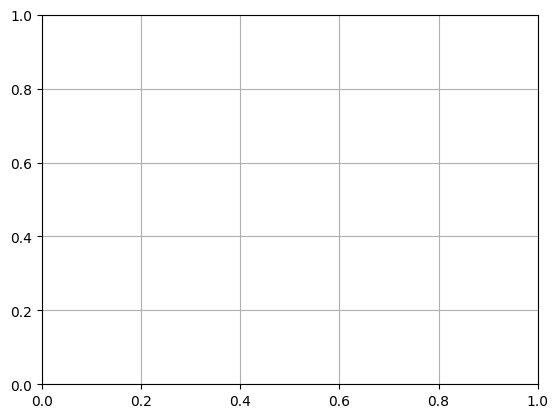

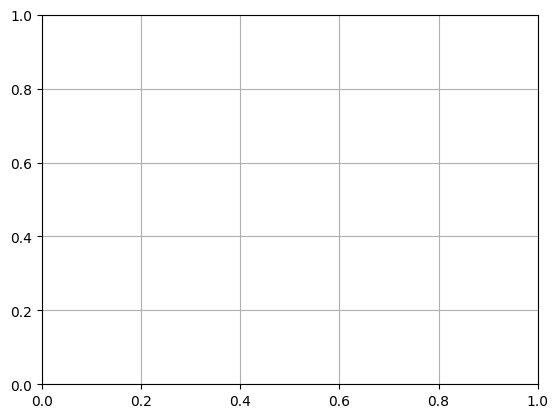

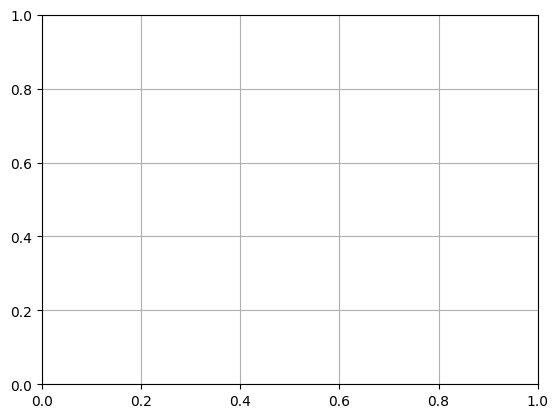

In [1]:
import ifcopenshell
import ifcopenshell.api
import ifcopenshell.api.context
import ifcopenshell.api.alignment

import numpy as np
import matplotlib.pyplot as plt

model = ifcopenshell.file(schema="IFC4X3_ADD2")

project = model.createIfcProject(Name="Dummy")

geometric_representation_context = ifcopenshell.api.context.add_context(model,context_type="Model")
axis_model_representation_subcontext = ifcopenshell.api.context.add_context(model,
    context_type="Model",context_identifier="Axis",target_view="GRAPH_VIEW",parent=geometric_representation_context)

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure().add_subplot()
fig1.grid(True)
fig2.grid(True)
fig3.grid(True)

coordinates = [(0.0,0.0),(500.0,0.0)]
radii = []
vpoints = [(0.0,0.0),(100.0,0.0),(200.0,150.0)]
lengths = [(50.)]

#coordinates = [(500.,2500.),(3340.0,  660.0),(4340.0, 5000.0),(7600.0, 4560.0),(8480.0, 2010.0)]
#radii = [(1000.),(1250.),(950.)]
#vpoints = [(0.0,100.0),(2000.,135.0),(5000.,105.),(7400.,153.),(9800.,105.),(12800.,90.)]
#lengths = [(1600.),(1200.),(2000.),(800.)]

alignment = ifcopenshell.api.alignment.create_alignment_by_pi_method(model,"Dummy",coordinates,radii,vpoints,lengths)
cc = alignment.Representation.Representations[0].Items[0]
gc = alignment.Representation.Representations[1].Items[0]
print(cc)
print(gc)
s = ifcopenshell.geom.settings()

shape = ifcopenshell.geom.create_shape(s,cc)
verts = shape.verts
verts = np.array(verts).reshape((-1,3))
x,y,z = verts.T
fig1.plot(x,y)

evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(s,ifcopenshell.ifcopenshell_wrapper.map_shape(s,gc.wrapped_data))
#results = evaluator.evaluate()

distances = evaluator.evaluation_points()
shape = ifcopenshell.geom.create_shape(s,gc)
verts = shape.verts
verts = np.array(verts).reshape((-1,3))
x,y,z = verts.T
fig2.plot(x,y)
fig3.plot(distances,z)

#print(ifcopenshell.alignment.evaluate_representation(cc,100.0))
#print(ifcopenshell.alignment.evaluate_representation(gc,100.0))
#for segment in cc.Segments:
#    l = segment.SegmentLength
#    print(ifcopenshell.alignment.evaluate_segment(segment,l.wrappedValue/2.))

model.write("C:/Users/bricer\OneDrive - Washington State Department of Transportation/Desktop/Test.ifc")
#model.write("C:/Users/rickb/OneDrive/Desktop/Test.ifc")